In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import kerastuner as kt

2024-06-26 08:24:36.309650: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 08:24:36.309750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 08:24:36.475785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_34/2516169643.py:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
geography = pd.get_dummies(df["Geography"], drop_first=True)
gender = pd.get_dummies(df["Gender"], drop_first=True)

In [8]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [9]:
df.drop(columns=["Gender", "Geography", "RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [10]:
df = pd.concat([df, geography, gender], axis=1)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [12]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()["Exited"]

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

In [13]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

In [14]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male']]
y = df["Exited"]

In [15]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False


In [16]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

In [17]:
# Convert the DataFrame and Series to NumPy arrays
X = X.values.astype(np.float32)
y = y.values.astype(np.int32)

In [18]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Here, hp means hyperparameter object
def build_model(hp):
  counter = 0
  model = Sequential()

  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    if counter == 0:
      model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=8), activation='relu'))
      model.add(Dropout(hp.Choice('dropout_' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
    else:
      model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=8), activation='relu'))
      model.add(Dropout(hp.Choice('dropout_' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
    counter+=1

  model.add(Dense(units=1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [21]:
tuner = kt.RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=3 ,
                     directory='my_dir',
                     project_name='Churn Modelling - ANN')

In [22]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 25s]
val_accuracy: 0.8034999966621399

Best val_accuracy So Far: 0.8125
Total elapsed time: 00h 01m 03s


In [23]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'units_0': 104,
 'dropout_0': 0.7,
 'units_1': 48,
 'dropout_1': 0.2,
 'units_2': 80,
 'dropout_2': 0.2,
 'units_3': 56,
 'dropout_3': 0.6,
 'units_4': 88,
 'dropout_4': 0.3,
 'units_5': 16,
 'dropout_5': 0.4,
 'units_6': 56,
 'dropout_6': 0.3,
 'units_7': 112,
 'dropout_7': 0.1,
 'units_8': 72,
 'dropout_8': 0.3,
 'units_9': 112,
 'dropout_9': 0.4}

In [24]:
tuner.results_summary()

Results summary
Results in my_dir/Churn Modelling - ANN
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 6
units_0: 104
dropout_0: 0.7
units_1: 48
dropout_1: 0.2
units_2: 80
dropout_2: 0.2
units_3: 56
dropout_3: 0.6
units_4: 88
dropout_4: 0.3
units_5: 16
dropout_5: 0.4
units_6: 56
dropout_6: 0.3
units_7: 112
dropout_7: 0.1
units_8: 72
dropout_8: 0.3
units_9: 112
dropout_9: 0.4
Score: 0.8125

Trial 0 summary
Hyperparameters:
num_layers: 10
units_0: 24
dropout_0: 0.4
units_1: 8
dropout_1: 0.1
units_2: 8
dropout_2: 0.1
units_3: 8
dropout_3: 0.1
units_4: 8
dropout_4: 0.1
units_5: 8
dropout_5: 0.1
units_6: 8
dropout_6: 0.1
units_7: 8
dropout_7: 0.1
units_8: 8
dropout_8: 0.1
units_9: 8
dropout_9: 0.1
Score: 0.8040000200271606

Trial 2 summary
Hyperparameters:
num_layers: 10
units_0: 16
dropout_0: 0.7
units_1: 56
dropout_1: 0.4
units_2: 24
dropout_2: 0.8
units_3: 24
dropout_3: 0.6
units_4: 80
dropout_4: 0.4
units_5: 120
dropo

In [25]:
model = tuner.get_best_models(num_models=1)[0]

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [26]:
# i will also be applying early stopping simultaneously - in order to determine the appropriate number of epochs
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [27]:
history = model.fit(X_train, y_train, epochs=1500, initial_epoch=5, validation_data=(X_test, y_test), callbacks=callback)

Epoch 6/1500
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8083 - loss: 0.4473 - val_accuracy: 0.8425 - val_loss: 0.4602
Epoch 7/1500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8167 - loss: 0.4332 - val_accuracy: 0.8480 - val_loss: 0.4330
Epoch 8/1500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8134 - loss: 0.4456 - val_accuracy: 0.8545 - val_loss: 0.4049
Epoch 9/1500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8142 - loss: 0.4348 - val_accuracy: 0.8555 - val_loss: 0.3872
Epoch 10/1500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8255 - loss: 0.4162 - val_accuracy: 0.8545 - val_loss: 0.3917
Epoch 11/1500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8325 - loss: 0.4069 - val_accuracy: 0.8595 - val_loss: 0.3754
Epoch 12/1500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.3838 - val_accuracy: 0.8505 - val_loss: 0.4001
Epoch 13/1500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8353 - loss: 0.40

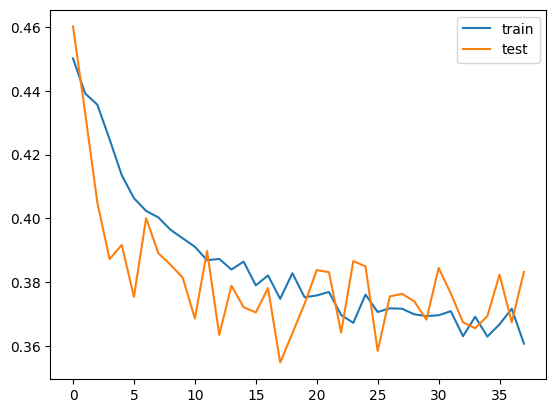

In [28]:
# training loss VS. validation (testing) loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [29]:
# Making the predictions and evaluating the model
# Predicting the Test set results

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


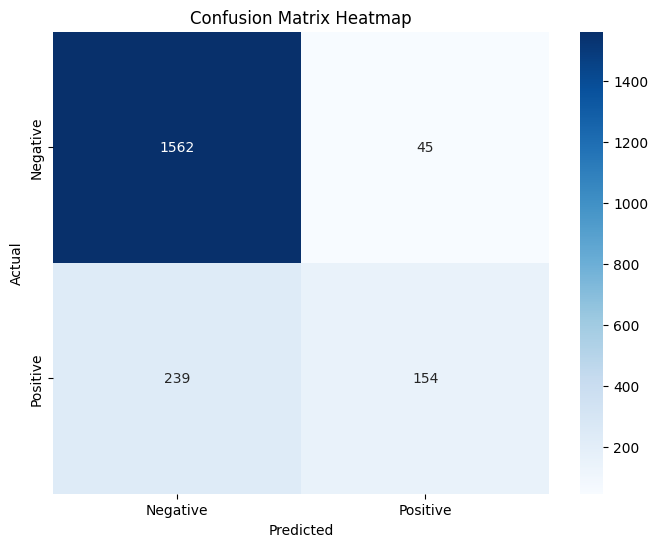

In [30]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [31]:
# Calculate the Accuracy (w.r.t testing data)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

print(f"The accuracy of the model is: {score}")

The accuracy of the model is: 0.858


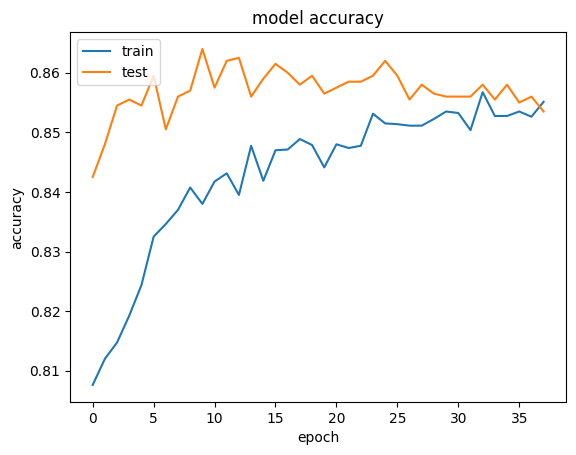

In [32]:
# summarizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()